In [2]:
import pandas as pd
import numpy as np

import requests
import bs4

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

## Web Scraping

In [111]:
# make requests from webpage

url = 'https://covidconnectnp.org'
result = requests.get(url)

In [112]:
# creating a soup object

soup = bs4.BeautifulSoup(result.text,'lxml')
print(soup)

<!DOCTYPE html>
<html lang="en">
<head>
<meta charset="utf-8"/>
<meta content="width=device-width, user-scalable=no, initial-scale=1.0, maximum-scale=1.0, minimum-scale=1.0" name="viewport"/>
<meta content="ie=edge" http-equiv="X-UA-Compatible"/>
<link href="https://covidconnectnp.org/front_assets/logo/favicon.png" rel="shortcut icon"/>
<link href="https://cdnjs.cloudflare.com/ajax/libs/font-awesome/5.15.1/css/all.min.css" rel="stylesheet"/>
<link href="https://fonts.googleapis.com/css?family=Roboto:300,400,500,700&amp;display=swap" rel="stylesheet"/>
<link href="https://cdnjs.cloudflare.com/ajax/libs/mdb-ui-kit/3.3.0/mdb.min.css" rel="stylesheet"/>
<link href="https://cdnjs.cloudflare.com/ajax/libs/toastr.js/latest/css/toastr.min.css" rel="stylesheet"/>
<link href="https://covidconnectnp.org/front_assets/css/customStyle.css" rel="stylesheet"/>
<title>Covid Connect Nepal</title>
<link href="https://cdnjs.cloudflare.com/ajax/libs/toastr.js/2.1.4/toastr.min.css" rel="stylesheet" type="te

In [113]:
# searching for headers

table_head = soup.find('thead')

headers = []

for i in table_head.find_all('th')[1:-1]:
    title = i.text
    headers.append(title)
    
    

In [114]:
headers

['Urgency', 'Type', 'Name', 'Address', 'No. Required']

In [115]:
df=pd.DataFrame(columns=headers)

In [116]:
df.head()

,Urgency,Type,Name,Address,No. Required


In [117]:
table_body = soup.find('tbody')

for j in table_body.find_all('tr')[1:-1]:
    row_data = j.find_all('td')
    row = [tr.text for tr in row_data[:-1]]
    length=len(df)
    df.loc[length] = row
    
    

In [118]:
print(row)

['\nUrgent\n', 'ICU', 'Meena Gaya', 'bhaktapur', '1']


In [120]:
df.head()

,Urgency,Type,Name,Address,No. Required
0,\nUrgent\n,Normal,Aahan Pal,Pokhara,1
1,\nUrgent\n,ICU,hom bahadur,kathmandu,1
2,\nUrgent\n,ICU,Hridaya Man Nakarmi,"Aadeshwor, Sitapaila",1
3,\nUrgent\n,ICU,Narayan upreti,Sinamangal,1
4,\nUrgent\n,Normal,Laxmi Devkota,Gondagu,1


In [121]:
df = df.replace('\n','', regex=True)

In [122]:
num_list = np.arange(1,len(df)+1)
num_list

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68,
       69, 70, 71, 72, 73])

In [123]:
df_num = pd.DataFrame(num_list,columns=['S.N'])

In [124]:
df=pd.concat([df_num,df],axis=1)

In [126]:
df.set_index(['S.N'],inplace=True)

In [127]:
df.head()

,Urgency,Type,Name,Address,No. Required
S.N,,,,,
1,Urgent,Normal,Aahan Pal,Pokhara,1
2,Urgent,ICU,hom bahadur,kathmandu,1
3,Urgent,ICU,Hridaya Man Nakarmi,"Aadeshwor, Sitapaila",1
4,Urgent,ICU,Narayan upreti,Sinamangal,1
5,Urgent,Normal,Laxmi Devkota,Gondagu,1


In [129]:
# saving data to disk

In [128]:
df.to_csv('covid.csv')

### loading the data 

In [5]:
df = pd.read_csv('covid.csv')

### EDA

In [6]:
df.head()

,S.N,Urgency,Type,Name,Address,No. Required
0,1,Urgent,Normal,Aahan Pal,Pokhara,1
1,2,Urgent,ICU,hom bahadur,kathmandu,1
2,3,Urgent,ICU,Hridaya Man Nakarmi,"Aadeshwor, Sitapaila",1
3,4,Urgent,ICU,Narayan upreti,Sinamangal,1
4,5,Urgent,Normal,Laxmi Devkota,Gondagu,1


In [7]:
df_Urg_ven = df.groupby('Urgency')['No. Required'].count()

In [8]:
urg_type=df_Urg_ven.index

In [9]:
df_Urg_ven

Urgency
Moderate      10
Not Urgent     7
Urgent        56
Name: No. Required, dtype: int64

In [10]:
df_Urg_no = df.groupby('Urgency')['Name'].count()

In [11]:
# df_Urg_no

In [12]:
num_urg = df_Urg_ven.values

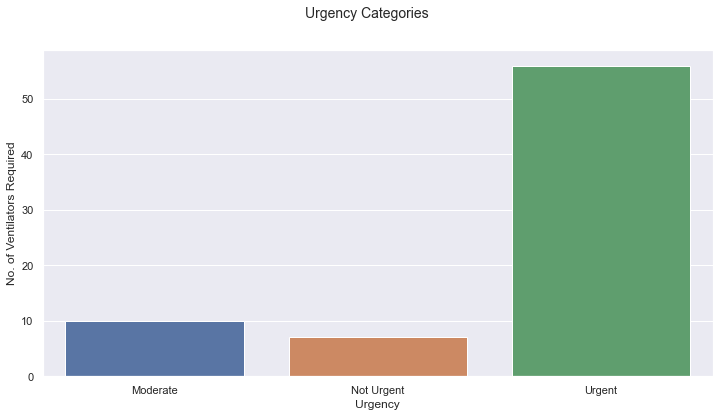

In [13]:
fig=plt.figure(figsize=(12,6))

plt.ylabel('No. of Ventilators Required')

fig.suptitle('Urgency Categories', fontsize=14)
sns.barplot(x=urg_type,y=num_urg)
plt.show()

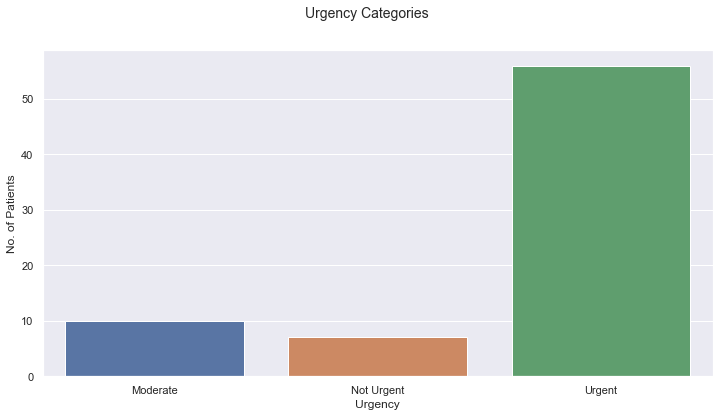

In [14]:
fig=plt.figure(figsize=(12,6))

plt.ylabel('No. of Patients')

fig.suptitle('Urgency Categories', fontsize=14)
sns.barplot(x=urg_type,y=num_urg)
plt.show()

In [15]:
df['Type'].unique()

array(['Normal', 'ICU', 'Unspecified', 'Isolation', 'Ventilator', nan],
      dtype=object)

In [16]:
df['Type'].value_counts()

ICU            38
Normal         21
Ventilator      7
Unspecified     5
Isolation       1
Name: Type, dtype: int64

In [17]:
df.loc[df['Type']==''] # locating the blank value

,S.N,Urgency,Type,Name,Address,No. Required


In [18]:
# replacing the missing value with unspecified value
df['Type'][36]='Unspecified'

<ipython-input-18-3bfd9e42170c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Type'][36]='Unspecified'


In [19]:
df['Type'].value_counts()

ICU            38
Normal         20
Ventilator      7
Unspecified     6
Isolation       1
Name: Type, dtype: int64

In [20]:
df_Type = df.groupby('Type')['No. Required'].count()
num_type = df_Type.head().values
service_type=df_Type.index


In [21]:
num_type

array([38,  1, 20,  6,  7])

In [22]:
service_type

Index(['ICU', 'Isolation', 'Normal', 'Unspecified', 'Ventilator'], dtype='object', name='Type')

In [23]:
df_no = df.groupby('Type')['Name'].count()

In [24]:
df_no

Type
ICU            38
Isolation       1
Normal         20
Unspecified     6
Ventilator      7
Name: Name, dtype: int64

In [25]:
#df_Type

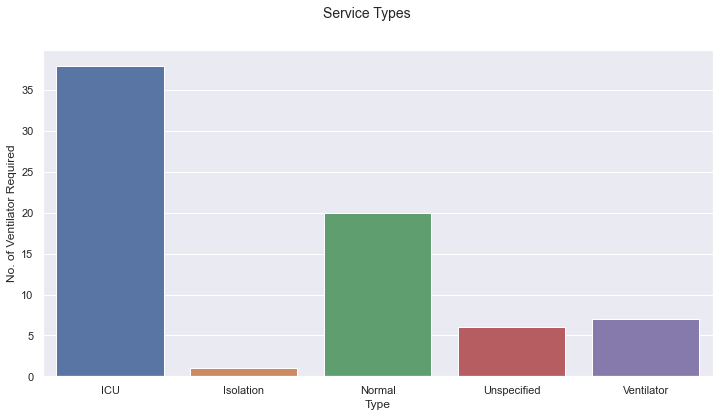

In [26]:
fig=plt.figure(figsize=(12,6))

fig.suptitle('Service Types', fontsize=14)

plt.ylabel('No. of Ventilator Required')

sns.barplot(x=service_type,y=num_type)
plt.show()

In [27]:
df['Address'].unique()

array(['Pokhara', 'kathmandu', 'Aadeshwor, Sitapaila', 'Sinamangal',
       'Gondagu', 'Kadaghari, Birendrachwok, Kathmandu', 'Bhaktapur',
       'Chabahil Kathmandu', 'Lokanthali, Bhaktapur', 'Byasi', 'Tilganga',
       'Bhaktapur Hospital', 'Tinkune', 'Balkot Chowk, Bhaktapur',
       'Balaju', 'MULPANI', 'Baneshwor', 'Saugal lalitpur',
       'ekantakuna Lalitupr', 'lokanthali', 'Hattiban', 'Ratopul',
       'Kamalpokhari', 'Lokanthali', 'Nuwakot', 'bhaktapur',
       'Alka Hospital', 'maharajgunj', 'Butwal', 'Machhegaun',
       'Civil hospital', 'Thulobharyang', 'Kalanki', 'Hattigaunda',
       'patan', 'Balkumari', 'Budhanilkantha', 'Lagenkhel, Lalitpur',
       'Sanepa, Lalitpur', 'Lagankhel', 'Kathmandu',
       'Teaching Hospital Emergency', 'Bir hospital', 'Teaching Hospital',
       'Dhangadhi; Kailali', 'Italian bakery sarswatinagar', 'dang',
       'Pepsicola', 'Bhairawa', 'Gaushala', 'Basundhara', 'Jorpati',
       'Kirtipur', 'Kuleshwor', 'Dallu Awas', 'Nidaan hospital']

In [28]:
ktm_list=['kathmandu', 'Aadeshwor, Sitapaila', 'Sinamangal','Gondagu','Chabahil Kathmandu','Tilganga','Tinkune','Balaju', 
          'MULPANI', 'Baneshwor','Ratopul','Kamalpokhari','maharajgunj','Machhegaun',
       'Civil hospital', 'Thulobharyang', 'Kalanki', 'Hattigaunda','Balkumari', 'Budhanilkantha','Kathmandu',
          'Teaching Hospital Emergency', 'Bir hospital', 'Teaching Hospital','Italian bakery sarswatinagar',
         'Gaushala', 'Basundhara', 'Jorpati','Kirtipur', 'Kuleshwor', 'Dallu Awas']
bkt_list=['Kadaghari, Birendrachwok, Kathmandu', 'Bhaktapur','Lokanthali, Bhaktapur','Bhaktapur Hospital','Balkot Chowk, Bhaktapur',
         'lokanthali','Lokanthali','bhaktapur','Pepsicola']
lat_list=['Saugal lalitpur','ekantakuna Lalitupr','patan','Lagenkhel, Lalitpur',
       'Sanepa, Lalitpur', 'Lagankhel','Nidaan hospital','Hattiban','Alka Hospital']
other=['Pokhara','Byasi','Nuwakot','Butwal','Dhangadhi; Kailali','Bhairawa','dang']


In [29]:
len(ktm_list)+len(bkt_list)+len(lat_list)+len(other)

56

In [30]:
len(df['Address'].unique())

56

In [31]:
d1 = dict.fromkeys(ktm_list, 'Kathmandu')
d2 = dict.fromkeys(bkt_list,'Bhaktapur')
d3 = dict.fromkeys(lat_list,'Lalitpur')
d4 = dict.fromkeys(other,'Others')

d ={**d1,**d2,**d3,**d4}
print(d)

{'kathmandu': 'Kathmandu', 'Aadeshwor, Sitapaila': 'Kathmandu', 'Sinamangal': 'Kathmandu', 'Gondagu': 'Kathmandu', 'Chabahil Kathmandu': 'Kathmandu', 'Tilganga': 'Kathmandu', 'Tinkune': 'Kathmandu', 'Balaju': 'Kathmandu', 'MULPANI': 'Kathmandu', 'Baneshwor': 'Kathmandu', 'Ratopul': 'Kathmandu', 'Kamalpokhari': 'Kathmandu', 'maharajgunj': 'Kathmandu', 'Machhegaun': 'Kathmandu', 'Civil hospital': 'Kathmandu', 'Thulobharyang': 'Kathmandu', 'Kalanki': 'Kathmandu', 'Hattigaunda': 'Kathmandu', 'Balkumari': 'Kathmandu', 'Budhanilkantha': 'Kathmandu', 'Kathmandu': 'Kathmandu', 'Teaching Hospital Emergency': 'Kathmandu', 'Bir hospital': 'Kathmandu', 'Teaching Hospital': 'Kathmandu', 'Italian bakery sarswatinagar': 'Kathmandu', 'Gaushala': 'Kathmandu', 'Basundhara': 'Kathmandu', 'Jorpati': 'Kathmandu', 'Kirtipur': 'Kathmandu', 'Kuleshwor': 'Kathmandu', 'Dallu Awas': 'Kathmandu', 'Kadaghari, Birendrachwok, Kathmandu': 'Bhaktapur', 'Bhaktapur': 'Bhaktapur', 'Lokanthali, Bhaktapur': 'Bhaktapur', 'B

In [32]:
df['Address_new'] = df['Address'].map(d)
df.head()

,S.N,Urgency,Type,Name,Address,No. Required,Address_new
0,1,Urgent,Normal,Aahan Pal,Pokhara,1,Others
1,2,Urgent,ICU,hom bahadur,kathmandu,1,Kathmandu
2,3,Urgent,ICU,Hridaya Man Nakarmi,"Aadeshwor, Sitapaila",1,Kathmandu
3,4,Urgent,ICU,Narayan upreti,Sinamangal,1,Kathmandu
4,5,Urgent,Normal,Laxmi Devkota,Gondagu,1,Kathmandu


In [33]:
addr_count = df.groupby('Address_new')['No. Required'].count()
addr_type=addr_count.index

In [34]:
addr_count_val=addr_count.values

In [35]:
addr_type

Index(['Bhaktapur', 'Kathmandu', 'Lalitpur', 'Others'], dtype='object', name='Address_new')

In [36]:
addr_count

Address_new
Bhaktapur    16
Kathmandu    40
Lalitpur     10
Others        7
Name: No. Required, dtype: int64

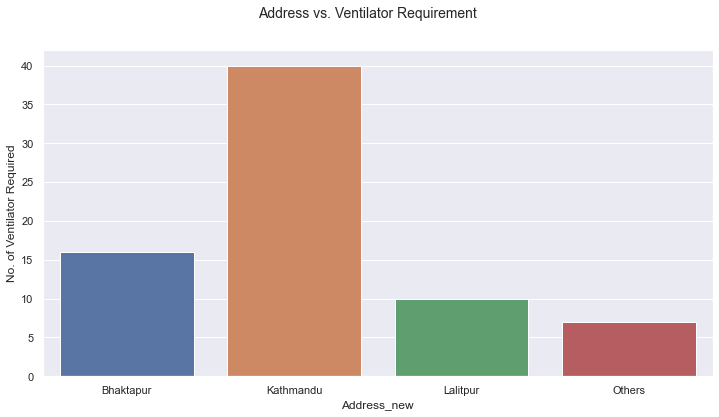

In [37]:
fig=plt.figure(figsize=(12,6))

fig.suptitle('Address vs. Ventilator Requirement', fontsize=14)

plt.ylabel('No. of Ventilator Required')

sns.barplot(x=addr_type,y=addr_count_val)
plt.show()

In [38]:
## groupby address and urgency

In [41]:
df_add_urg=df.groupby(['Address_new','Urgency'])['No. Required'].count()

In [65]:
df_add_urg = pd.DataFrame(df_add_urg)

In [70]:
df_add_urg.reset_index(inplace=True)

In [71]:
df_add_urg

,Address_new,Urgency,No. Required
0,Bhaktapur,Moderate,5
1,Bhaktapur,Not Urgent,3
2,Bhaktapur,Urgent,8
3,Kathmandu,Moderate,4
4,Kathmandu,Not Urgent,4
5,Kathmandu,Urgent,32
6,Lalitpur,Urgent,10
7,Others,Moderate,1
8,Others,Urgent,6


In [44]:
val_add_urg = df_add_urg.values

In [54]:
df_add_urg.index

MultiIndex([('Bhaktapur',   'Moderate'),
            ('Bhaktapur', 'Not Urgent'),
            ('Bhaktapur',     'Urgent'),
            ('Kathmandu',   'Moderate'),
            ('Kathmandu', 'Not Urgent'),
            ('Kathmandu',     'Urgent'),
            ( 'Lalitpur',     'Urgent'),
            (   'Others',   'Moderate'),
            (   'Others',     'Urgent')],
           names=['Address_new', 'Urgency'])

In [60]:
df_add_index = df_add_urg.index.get_level_values(0)

In [62]:
df_urg_index= df_add_urg.index.get_level_values(1)
df_urg_index

Index(['Moderate', 'Not Urgent', 'Urgent', 'Moderate', 'Not Urgent', 'Urgent',
       'Urgent', 'Moderate', 'Urgent'],
      dtype='object', name='Urgency')

In [ ]:
# df = pd.DataFrame(zip(x*3, ["y"]*3+["z"]*3+["k"]*3, y+z+k), columns=["time", "kind", "data"])
# plt.figure(figsize=(10, 6))
# sns.barplot(x="time", hue="kind", y="data", data=df)
# plt.show()

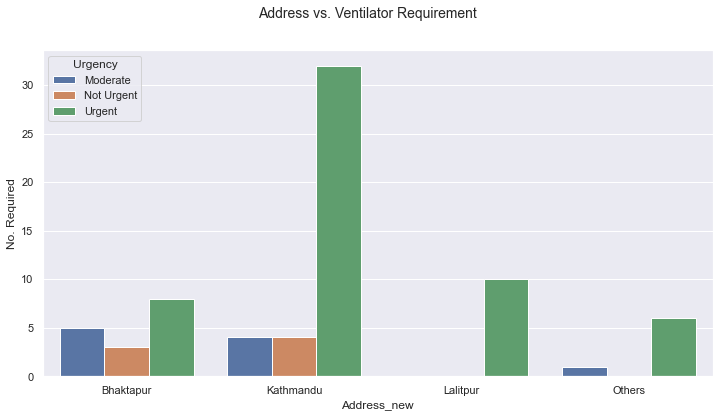

In [74]:
fig=plt.figure(figsize=(12,6))

fig.suptitle('Address vs. Ventilator Requirement', fontsize=14)

sns.barplot(x='Address_new',y='No. Required',hue='Urgency',data=df_add_urg)
plt.show()
